In [2]:
import pandas as pd

In [3]:
df_data = pd.read_csv('./train_male (1).csv')
df_predict = pd.read_csv('./test_male (1).csv')
df_data.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_predict.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
df_data

,결과,득점_득점,공격종합성공률,후위성공률,퀵오픈성공률,서브성공률,디그성공률,세트성공률,리시브성공률,블로킹성공률,...,팀명_우리카드,팀명_한국전력,팀명_현대캐피탈,상대팀_KB손해보험,상대팀_OK금융그룹,상대팀_대한항공,상대팀_삼성화재,상대팀_우리카드,상대팀_한국전력,상대팀_현대캐피탈
0,1,76,0.525862,0.382353,0.714286,0.097087,0.804348,0.517857,0.481928,0.102041,...,0,0,0,0,0,0,1,0,0,0
1,1,50,0.523810,0.470588,0.500000,0.114286,0.883721,0.479452,0.454545,0.243243,...,0,0,0,0,0,0,0,0,0,1
2,0,59,0.438095,0.458333,0.517241,0.075000,0.809524,0.413793,0.493333,0.109375,...,0,0,0,0,0,0,0,0,1,0
3,1,48,0.480519,0.529412,0.733333,0.122449,0.729730,0.492958,0.340426,0.208333,...,0,0,0,0,0,1,0,0,0,0
4,0,81,0.538462,0.620690,0.468750,0.074074,0.800000,0.486239,0.510204,0.175439,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,0,68,0.508929,0.458333,0.583333,0.000000,0.729167,0.472441,0.562500,0.177419,...,0,0,1,0,0,0,0,1,0,0
1216,0,25,0.478261,0.375000,0.500000,0.021277,0.740741,0.454545,0.425532,0.090909,...,0,0,1,0,0,0,1,0,0,0
1217,0,62,0.475248,0.500000,0.645161,0.035714,0.629630,0.448980,0.623188,0.229167,...,0,0,1,0,0,1,0,0,0,0
1218,0,35,0.476923,0.388889,0.647059,0.025641,0.805556,0.455696,0.383333,0.107143,...,0,0,1,1,0,0,0,0,0,0


In [5]:
df_data.columns

Index(['결과', '득점_득점', '공격종합성공률', '후위성공률', '퀵오픈성공률', '서브성공률', '디그성공률', '세트성공률',
       '리시브성공률', '블로킹성공률', '팀명_KB손해보험', '팀명_OK금융그룹', '팀명_대한항공', '팀명_삼성화재',
       '팀명_우리카드', '팀명_한국전력', '팀명_현대캐피탈', '상대팀_KB손해보험', '상대팀_OK금융그룹',
       '상대팀_대한항공', '상대팀_삼성화재', '상대팀_우리카드', '상대팀_한국전력', '상대팀_현대캐피탈'],
      dtype='object')

In [6]:
KB손해보험 = df_data[df_data['팀명_KB손해보험'] == 1]

OK금융그룹 = df_data[df_data['팀명_OK금융그룹'] == 1]

대한항공 = df_data[df_data['팀명_대한항공'] == 1]

삼성화재 = df_data[df_data['팀명_삼성화재'] == 1]

우리카드 = df_data[df_data['팀명_우리카드'] == 1]

한국전력 = df_data[df_data['팀명_한국전력'] == 1]

현대캐피탈 = df_data[df_data['팀명_현대캐피탈'] == 1]



In [7]:
KB손해보험 = KB손해보험.drop(columns=['팀명_KB손해보험', '팀명_OK금융그룹', '팀명_대한항공', '팀명_삼성화재', '팀명_한국전력', '팀명_현대캐피탈','팀명_우리카드','상대팀_KB손해보험'])

OK금융그룹 = OK금융그룹.drop(columns=['팀명_KB손해보험', '팀명_OK금융그룹', '팀명_대한항공', '팀명_삼성화재', '팀명_한국전력', '팀명_현대캐피탈','팀명_우리카드','상대팀_OK금융그룹'])

대한항공 = 대한항공.drop(columns=['팀명_KB손해보험', '팀명_OK금융그룹', '팀명_대한항공', '팀명_삼성화재', '팀명_한국전력', '팀명_현대캐피탈','팀명_우리카드','상대팀_대한항공'])

삼성화재 = 삼성화재.drop(columns=['팀명_KB손해보험', '팀명_OK금융그룹', '팀명_대한항공', '팀명_삼성화재', '팀명_한국전력', '팀명_현대캐피탈','팀명_우리카드','상대팀_삼성화재'])

우리카드 = 우리카드.drop(columns=['팀명_KB손해보험', '팀명_OK금융그룹', '팀명_대한항공', '팀명_삼성화재', '팀명_한국전력', '팀명_현대캐피탈','팀명_우리카드','상대팀_우리카드'])

한국전력 = 한국전력.drop(columns=['팀명_KB손해보험', '팀명_OK금융그룹', '팀명_대한항공', '팀명_삼성화재', '팀명_한국전력', '팀명_현대캐피탈','팀명_우리카드','상대팀_한국전력'])

현대캐피탈 = 현대캐피탈.drop(columns=['팀명_KB손해보험', '팀명_OK금융그룹', '팀명_대한항공', '팀명_삼성화재', '팀명_한국전력', '팀명_현대캐피탈','팀명_우리카드','상대팀_현대캐피탈'])


In [8]:
우리카드

,결과,득점_득점,공격종합성공률,후위성공률,퀵오픈성공률,서브성공률,디그성공률,세트성공률,리시브성공률,블로킹성공률,상대팀_KB손해보험,상대팀_OK금융그룹,상대팀_대한항공,상대팀_삼성화재,상대팀_한국전력,상대팀_현대캐피탈
696,0,52,0.494737,0.611111,0.714286,0.044118,0.777778,0.456140,0.356164,0.048780,0,0,1,0,0,0
697,0,61,0.525773,0.550000,0.515152,0.032967,0.780000,0.459459,0.597403,0.129630,0,0,0,0,0,1
698,0,80,0.588785,0.666667,0.791667,0.047619,0.707317,0.560748,0.566667,0.226415,0,0,0,1,0,0
699,1,82,0.606061,0.740741,0.444444,0.104762,0.755556,0.574257,0.384615,0.189655,0,1,0,0,0,0
700,1,82,0.543860,0.468750,0.586207,0.079646,0.767857,0.495868,0.489130,0.186441,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,1,74,0.504202,0.636364,0.642857,0.039604,0.784314,0.510000,0.472222,0.192308,0,0,0,0,0,1
870,1,68,0.510000,0.529412,0.666667,0.064516,0.800000,0.505051,0.440678,0.215686,0,0,1,0,0,0
871,0,40,0.440000,0.388889,0.470588,0.035088,0.820513,0.413333,0.288136,0.121951,1,0,0,0,0,0
872,1,72,0.403226,0.500000,0.551724,0.021505,0.802632,0.385827,0.452055,0.298507,0,0,0,0,1,0


In [9]:
KB손해보험_predict = df_predict[df_predict['팀명_KB손해보험'] == 1]

OK금융그룹_predict = df_predict[df_predict['팀명_OK금융그룹'] == 1]

대한항공_predict = df_predict[df_predict['팀명_대한항공'] == 1]

삼성화재_predict = df_predict[df_predict['팀명_삼성화재'] == 1]

우리카드_predict = df_predict[df_predict['팀명_우리카드'] == 1]

한국전력_predict = df_predict[df_predict['팀명_한국전력'] == 1]

현대캐피탈_predict = df_predict[df_predict['팀명_현대캐피탈'] == 1]


In [10]:
KB손해보험_predict = KB손해보험_predict.drop(columns=['팀명_KB손해보험', '팀명_OK금융그룹', '팀명_대한항공', '팀명_삼성화재', '팀명_한국전력', '팀명_현대캐피탈','팀명_우리카드','상대팀_KB손해보험'])

OK금융그룹_predict = OK금융그룹_predict.drop(columns=['팀명_KB손해보험', '팀명_OK금융그룹', '팀명_대한항공', '팀명_삼성화재', '팀명_한국전력', '팀명_현대캐피탈','팀명_우리카드','상대팀_OK금융그룹'])

대한항공_predict = 대한항공_predict.drop(columns=['팀명_KB손해보험', '팀명_OK금융그룹', '팀명_대한항공', '팀명_삼성화재', '팀명_한국전력', '팀명_현대캐피탈','팀명_우리카드','상대팀_대한항공'])

삼성화재_predict = 삼성화재_predict.drop(columns=['팀명_KB손해보험', '팀명_OK금융그룹', '팀명_대한항공', '팀명_삼성화재', '팀명_한국전력', '팀명_현대캐피탈','팀명_우리카드','상대팀_삼성화재'])

우리카드_predict = 우리카드_predict.drop(columns=['팀명_KB손해보험', '팀명_OK금융그룹', '팀명_대한항공', '팀명_삼성화재', '팀명_한국전력', '팀명_현대캐피탈','팀명_우리카드','상대팀_우리카드'])

한국전력_predict = 한국전력_predict.drop(columns=['팀명_KB손해보험', '팀명_OK금융그룹', '팀명_대한항공', '팀명_삼성화재', '팀명_한국전력', '팀명_현대캐피탈','팀명_우리카드','상대팀_한국전력'])

현대캐피탈_predict = 현대캐피탈_predict.drop(columns=['팀명_KB손해보험', '팀명_OK금융그룹', '팀명_대한항공', '팀명_삼성화재', '팀명_한국전력', '팀명_현대캐피탈','팀명_우리카드','상대팀_현대캐피탈'])


In [11]:
KB손해보험_predict =KB손해보험_predict.reset_index().drop(columns='index')

OK금융그룹_predict =OK금융그룹_predict.reset_index().drop(columns='index')

대한항공_predict =대한항공_predict.reset_index().drop(columns='index')

삼성화재_predict =삼성화재_predict.reset_index().drop(columns='index')

우리카드_predict =우리카드_predict.reset_index().drop(columns='index')

한국전력_predict =한국전력_predict.reset_index().drop(columns='index')

현대캐피탈_predict =현대캐피탈_predict.reset_index().drop(columns='index')

/home/lsg/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/home/lsg/anaconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/home/lsg/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


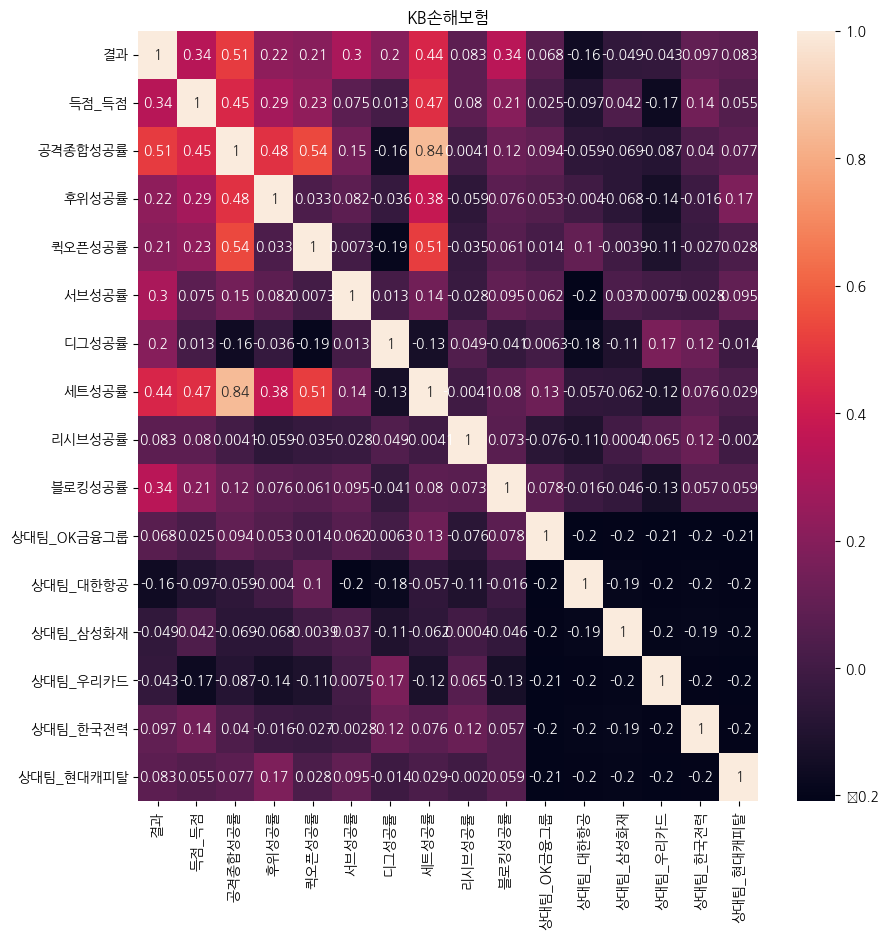

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.figure(figsize=(10,10))
plt.title('KB손해보험')
_= sns.heatmap(KB손해보험.corr(), annot=True)

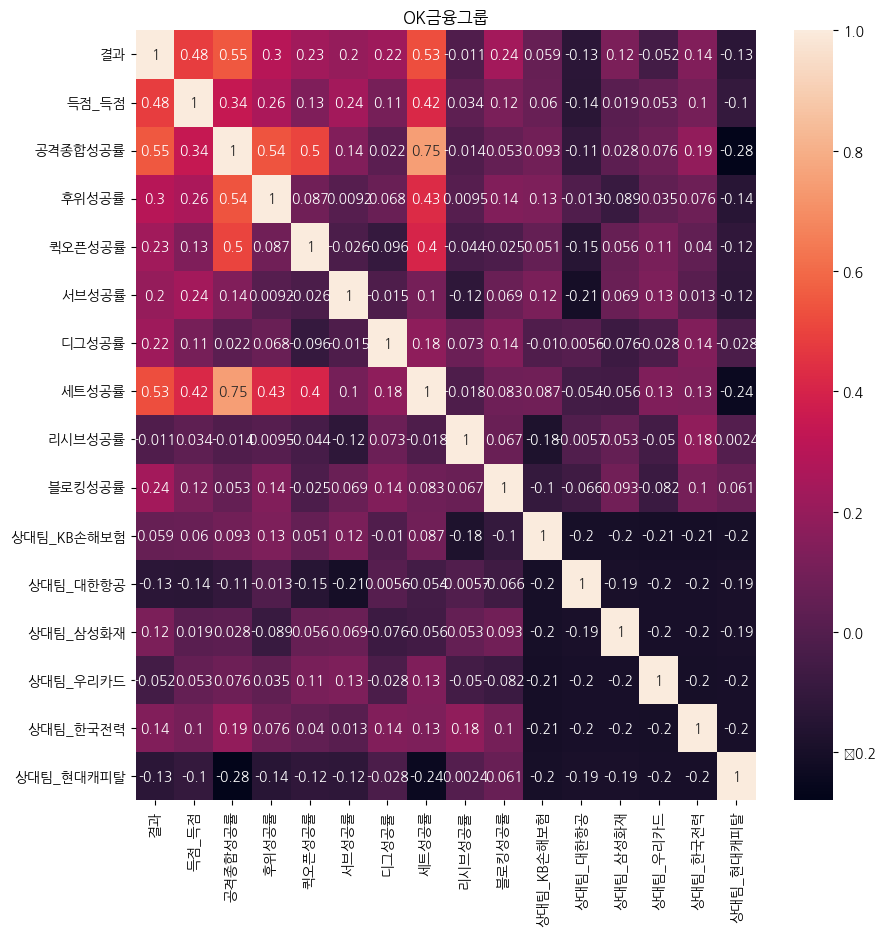

In [13]:
plt.figure(figsize=(10,10))

plt.title('OK금융그룹')
_= sns.heatmap(OK금융그룹.corr(), annot=True)

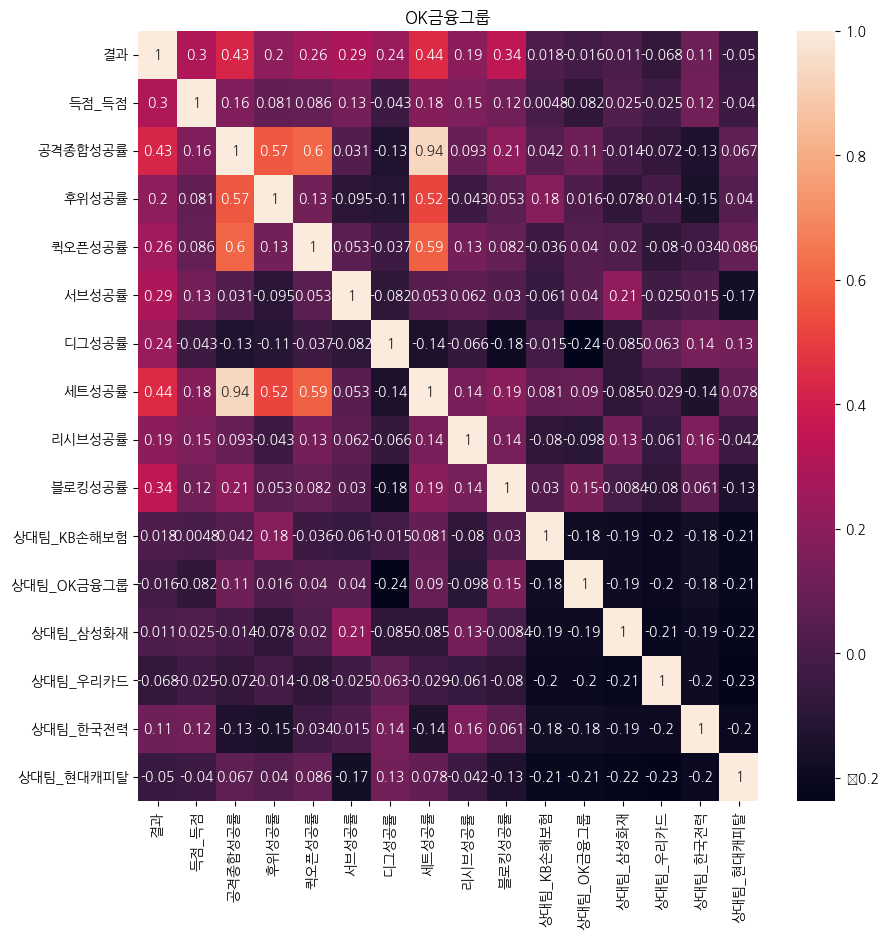

In [14]:
plt.figure(figsize=(10,10))

plt.title('OK금융그룹')
_= sns.heatmap(대한항공.corr(), annot=True)

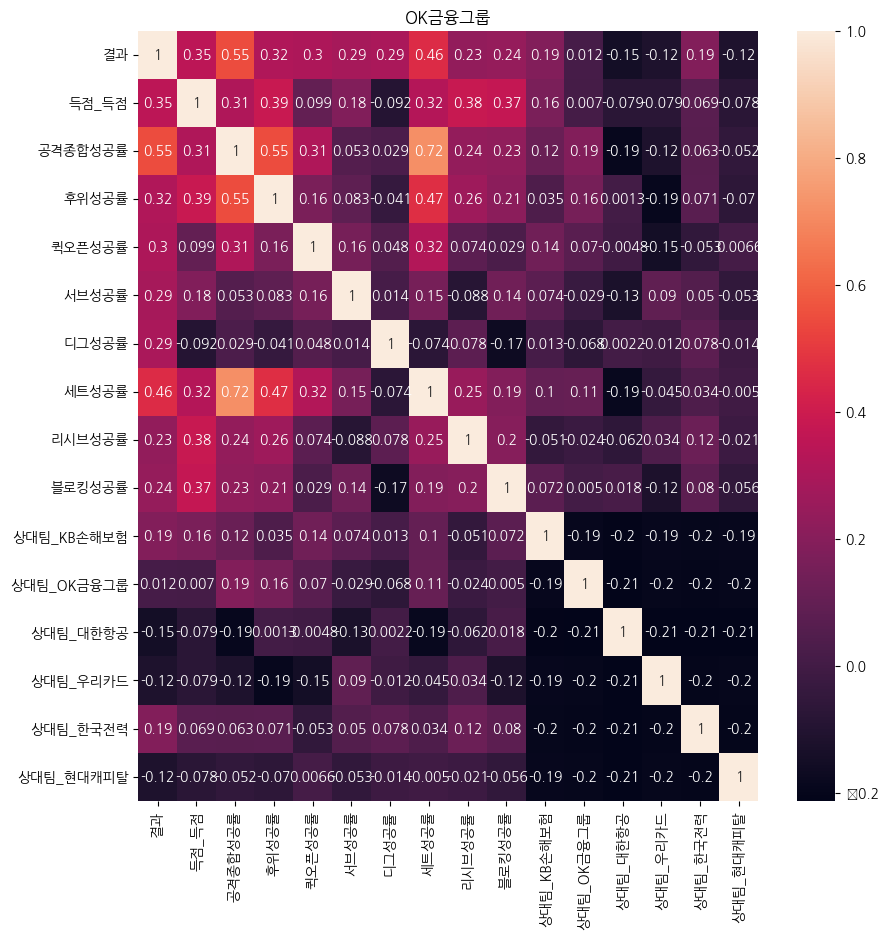

In [15]:
plt.figure(figsize=(10,10))

plt.title('OK금융그룹')
_= sns.heatmap(삼성화재.corr(), annot=True)

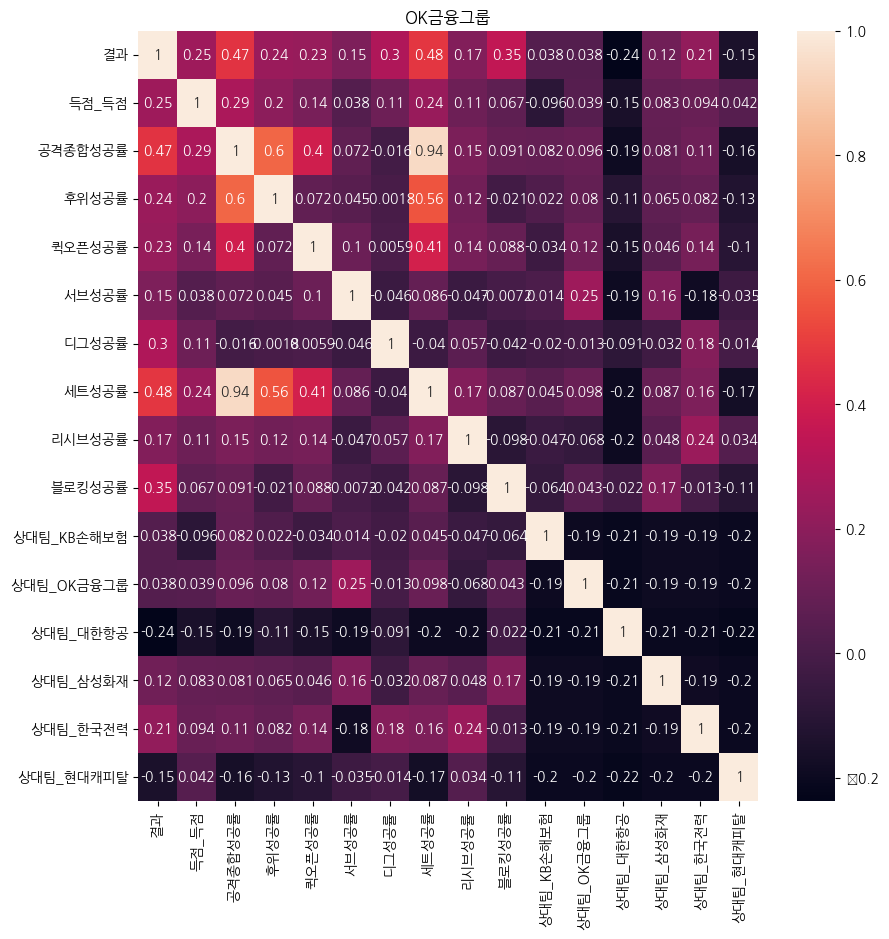

In [16]:
plt.figure(figsize=(10,10))

plt.title('OK금융그룹')
_= sns.heatmap(우리카드.corr(), annot=True)

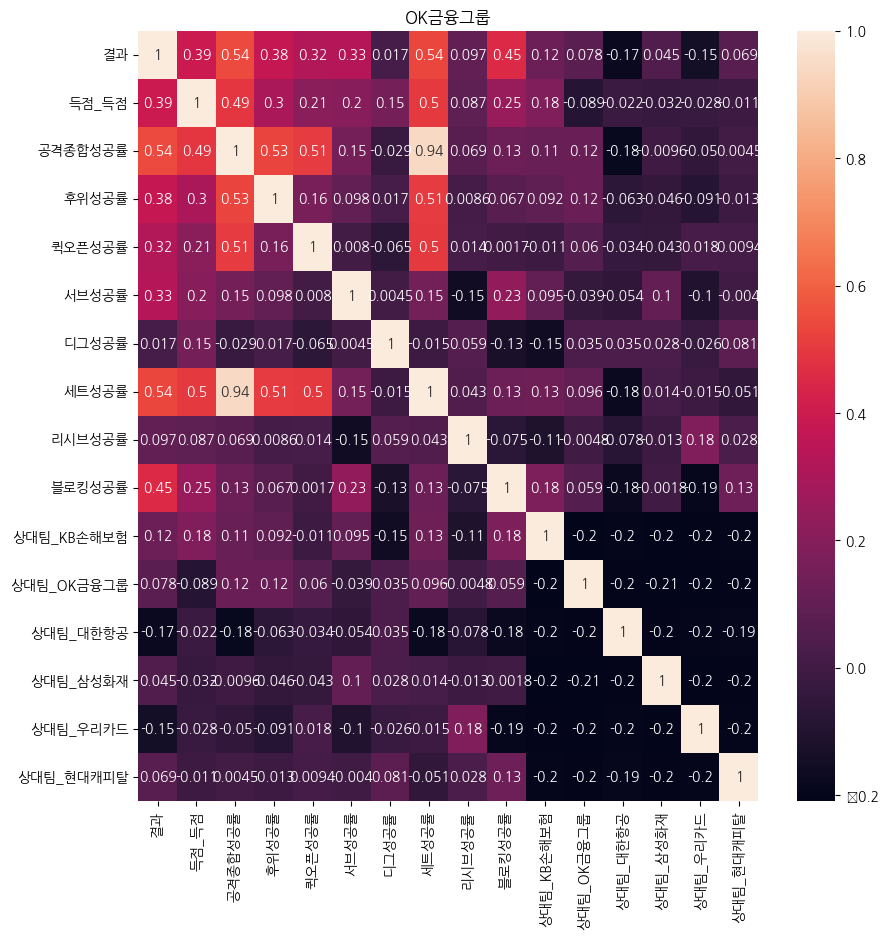

In [17]:
plt.figure(figsize=(10,10))

plt.title('OK금융그룹')
_= sns.heatmap(한국전력.corr(), annot=True)

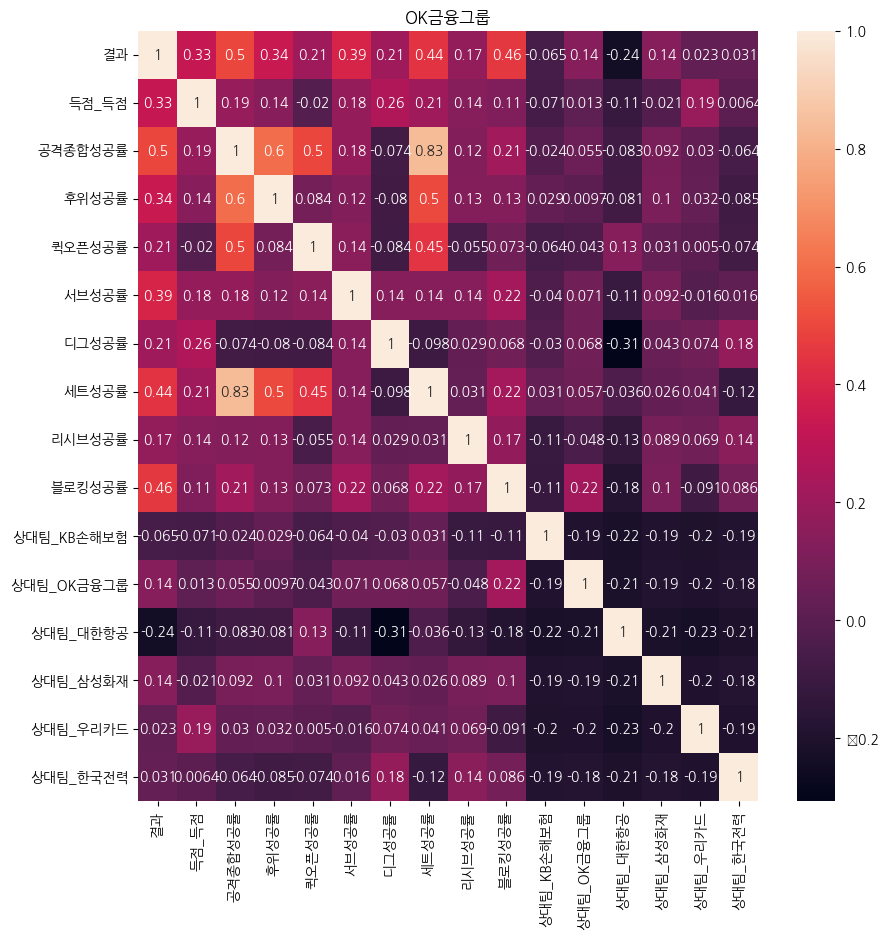

In [18]:
plt.figure(figsize=(10,10))

plt.title('OK금융그룹')
_= sns.heatmap(현대캐피탈.corr(), annot=True)

팀별 학습 진행후, 제일 좋은 모델을 기반으로
팀, 상대팀 입력
팀의 스탯은 평균값을 중심으로 min~max 범위내로 조정해서 함수 입력
상대팀과의 상성과 임의로 주어진 스탯을 중심으로 승패 계산

# 각 팀 별 모델 만들기

In [19]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


lgb = LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
                class_weight=None, feature_fraction=0.5,
                importance_type='split', learning_rate=0.4, max_depth=-1,
                min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
                n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
                random_state=0, reg_alpha=0.005, reg_lambda=0.0005,
                silent='warn', subsample_for_bin=200000)
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                        class_weight='balanced_subsample', criterion='entropy',
                        max_depth=4, max_features='log2', max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0002,
                        min_samples_leaf=5,
                        min_samples_split=9, min_weight_fraction_leaf=0.0,
                        n_estimators=130, n_jobs=-1, oob_score=False,
                        random_state=0, verbose=0, warm_start=False)
gbc = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.01, loss='log_loss', max_depth=7,
                            max_features='sqrt', max_leaf_nodes=None,
                            min_impurity_decrease=0.05,
                            min_samples_leaf=2, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=140,
                            n_iter_no_change=None,
                            random_state=0, subsample=0.35, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False)


In [20]:
# KB손해보험 

model_KB = VotingClassifier([('lgb', lgb), ('rf',rf), ('gbc',gbc)], voting= 'soft')
X= KB손해보험.drop(columns=['결과'])
y = KB손해보험['결과']
model_KB.fit(X,y)

[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


VotingClassifier(estimators=[('lgb',
                              LGBMClassifier(bagging_fraction=0.9,
                                             bagging_freq=3,
                                             feature_fraction=0.5,
                                             learning_rate=0.4,
                                             min_child_samples=6,
                                             min_split_gain=0.3,
                                             n_estimators=20, num_leaves=150,
                                             random_state=0, reg_alpha=0.005,
                                             reg_lambda=0.0005)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced_subsample',
                                                     criterion='entropy',
                                                     max_depth=4,
                                                     max_features='log2',
                                                     min_impurity_decrease=0.0002,
                                                     min_samples_leaf=5,
                                                     min_samples_split=9,
                                                     n_estimators=130,
                                                     n_jobs=-1,
                                                     random_state=0)),
                             ('gbc',
                              GradientBoostingClassifier(learning_rate=0.01,
                                                         max_depth=7,
                                                         max_features='sqrt',
                                                         min_impurity_decrease=0.05,
                                                         min_samples_leaf=2,
                                                         n_estimators=140,
                                                         random_state=0,
                                                         subsample=0.35))],
                 voting='soft')

In [21]:
#OK금융그룹 

model_OK = VotingClassifier([('lgb', lgb), ('rf',rf), ('gbc',gbc)], voting= 'soft')
X= OK금융그룹.drop(columns=['결과'])
y = OK금융그룹['결과']
model_OK.fit(X,y)

VotingClassifier(estimators=[('lgb',
                              LGBMClassifier(bagging_fraction=0.9,
                                             bagging_freq=3,
                                             feature_fraction=0.5,
                                             learning_rate=0.4,
                                             min_child_samples=6,
                                             min_split_gain=0.3,
                                             n_estimators=20, num_leaves=150,
                                             random_state=0, reg_alpha=0.005,
                                             reg_lambda=0.0005)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced_subsample',
                                                     criterion='entropy',
                                                     max_depth=4,
                                                     max_features='log2',
                                                     min_impurity_decrease=0.0002,
                                                     min_samples_leaf=5,
                                                     min_samples_split=9,
                                                     n_estimators=130,
                                                     n_jobs=-1,
                                                     random_state=0)),
                             ('gbc',
                              GradientBoostingClassifier(learning_rate=0.01,
                                                         max_depth=7,
                                                         max_features='sqrt',
                                                         min_impurity_decrease=0.05,
                                                         min_samples_leaf=2,
                                                         n_estimators=140,
                                                         random_state=0,
                                                         subsample=0.35))],
                 voting='soft')

In [22]:
#대한항공 

model_대한 = VotingClassifier([('lgb', lgb), ('rf',rf), ('gbc',gbc)], voting= 'soft')
X= 대한항공.drop(columns=['결과'])
y = 대한항공['결과']
model_대한.fit(X,y)

VotingClassifier(estimators=[('lgb',
                              LGBMClassifier(bagging_fraction=0.9,
                                             bagging_freq=3,
                                             feature_fraction=0.5,
                                             learning_rate=0.4,
                                             min_child_samples=6,
                                             min_split_gain=0.3,
                                             n_estimators=20, num_leaves=150,
                                             random_state=0, reg_alpha=0.005,
                                             reg_lambda=0.0005)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced_subsample',
                                                     criterion='entropy',
                                                     max_depth=4,
                                                     max_features='log2',
                                                     min_impurity_decrease=0.0002,
                                                     min_samples_leaf=5,
                                                     min_samples_split=9,
                                                     n_estimators=130,
                                                     n_jobs=-1,
                                                     random_state=0)),
                             ('gbc',
                              GradientBoostingClassifier(learning_rate=0.01,
                                                         max_depth=7,
                                                         max_features='sqrt',
                                                         min_impurity_decrease=0.05,
                                                         min_samples_leaf=2,
                                                         n_estimators=140,
                                                         random_state=0,
                                                         subsample=0.35))],
                 voting='soft')

In [23]:
#삼성화재 

model_삼성 = VotingClassifier([('lgb', lgb), ('rf',rf), ('gbc',gbc)], voting= 'soft')
X= 삼성화재.drop(columns=['결과'])
y = 삼성화재['결과']
model_삼성.fit(X,y)

VotingClassifier(estimators=[('lgb',
                              LGBMClassifier(bagging_fraction=0.9,
                                             bagging_freq=3,
                                             feature_fraction=0.5,
                                             learning_rate=0.4,
                                             min_child_samples=6,
                                             min_split_gain=0.3,
                                             n_estimators=20, num_leaves=150,
                                             random_state=0, reg_alpha=0.005,
                                             reg_lambda=0.0005)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced_subsample',
                                                     criterion='entropy',
                                                     max_depth=4,
                                                     max_features='log2',
                                                     min_impurity_decrease=0.0002,
                                                     min_samples_leaf=5,
                                                     min_samples_split=9,
                                                     n_estimators=130,
                                                     n_jobs=-1,
                                                     random_state=0)),
                             ('gbc',
                              GradientBoostingClassifier(learning_rate=0.01,
                                                         max_depth=7,
                                                         max_features='sqrt',
                                                         min_impurity_decrease=0.05,
                                                         min_samples_leaf=2,
                                                         n_estimators=140,
                                                         random_state=0,
                                                         subsample=0.35))],
                 voting='soft')

In [24]:
#우리카드 

model_우리 = VotingClassifier([('lgb', lgb), ('rf',rf), ('gbc',gbc)], voting= 'soft')
X= 우리카드.drop(columns=['결과'])
y = 우리카드['결과']
model_우리.fit(X,y)

VotingClassifier(estimators=[('lgb',
                              LGBMClassifier(bagging_fraction=0.9,
                                             bagging_freq=3,
                                             feature_fraction=0.5,
                                             learning_rate=0.4,
                                             min_child_samples=6,
                                             min_split_gain=0.3,
                                             n_estimators=20, num_leaves=150,
                                             random_state=0, reg_alpha=0.005,
                                             reg_lambda=0.0005)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced_subsample',
                                                     criterion='entropy',
                                                     max_depth=4,
                                                     max_features='log2',
                                                     min_impurity_decrease=0.0002,
                                                     min_samples_leaf=5,
                                                     min_samples_split=9,
                                                     n_estimators=130,
                                                     n_jobs=-1,
                                                     random_state=0)),
                             ('gbc',
                              GradientBoostingClassifier(learning_rate=0.01,
                                                         max_depth=7,
                                                         max_features='sqrt',
                                                         min_impurity_decrease=0.05,
                                                         min_samples_leaf=2,
                                                         n_estimators=140,
                                                         random_state=0,
                                                         subsample=0.35))],
                 voting='soft')

In [25]:
#한국전력 

model_한전 = VotingClassifier([('lgb', lgb), ('rf',rf), ('gbc',gbc)], voting= 'soft')
X= 한국전력.drop(columns=['결과'])
y = 한국전력['결과']
model_한전.fit(X,y)

VotingClassifier(estimators=[('lgb',
                              LGBMClassifier(bagging_fraction=0.9,
                                             bagging_freq=3,
                                             feature_fraction=0.5,
                                             learning_rate=0.4,
                                             min_child_samples=6,
                                             min_split_gain=0.3,
                                             n_estimators=20, num_leaves=150,
                                             random_state=0, reg_alpha=0.005,
                                             reg_lambda=0.0005)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced_subsample',
                                                     criterion='entropy',
                                                     max_depth=4,
                                                     max_features='log2',
                                                     min_impurity_decrease=0.0002,
                                                     min_samples_leaf=5,
                                                     min_samples_split=9,
                                                     n_estimators=130,
                                                     n_jobs=-1,
                                                     random_state=0)),
                             ('gbc',
                              GradientBoostingClassifier(learning_rate=0.01,
                                                         max_depth=7,
                                                         max_features='sqrt',
                                                         min_impurity_decrease=0.05,
                                                         min_samples_leaf=2,
                                                         n_estimators=140,
                                                         random_state=0,
                                                         subsample=0.35))],
                 voting='soft')

In [26]:
#현대캐피탈 

model_현대 = VotingClassifier([('lgb', lgb), ('rf',rf), ('gbc',gbc)], voting= 'soft')
X= 현대캐피탈.drop(columns=['결과'])
y = 현대캐피탈['결과']
model_현대.fit(X,y)

VotingClassifier(estimators=[('lgb',
                              LGBMClassifier(bagging_fraction=0.9,
                                             bagging_freq=3,
                                             feature_fraction=0.5,
                                             learning_rate=0.4,
                                             min_child_samples=6,
                                             min_split_gain=0.3,
                                             n_estimators=20, num_leaves=150,
                                             random_state=0, reg_alpha=0.005,
                                             reg_lambda=0.0005)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced_subsample',
                                                     criterion='entropy',
                                                     max_depth=4,
                                                     max_features='log2',
                                                     min_impurity_decrease=0.0002,
                                                     min_samples_leaf=5,
                                                     min_samples_split=9,
                                                     n_estimators=130,
                                                     n_jobs=-1,
                                                     random_state=0)),
                             ('gbc',
                              GradientBoostingClassifier(learning_rate=0.01,
                                                         max_depth=7,
                                                         max_features='sqrt',
                                                         min_impurity_decrease=0.05,
                                                         min_samples_leaf=2,
                                                         n_estimators=140,
                                                         random_state=0,
                                                         subsample=0.35))],
                 voting='soft')

입력예시: 우리카드, 우리카드_predict

In [27]:
predict_data = 우리카드_predict.drop(columns=['결과'])

In [28]:
pred = model_우리.predict(predict_data)

In [29]:
def winning_predict( model,x=predict_data,):
    win_lose = model.predict(x)
    for i in range(len(win_lose)):
        if win_lose[i] == 1:
            if x.iloc[i,9] == 1:
                print(f'{x.columns[9]}에게 승리')
            elif x.iloc[i,10] == 1:
                print(f'{x.columns[10]}에게 승리')            
            elif x.iloc[i,11] == 1:
                print(f'{x.columns[11]}에게 승리')
            elif x.iloc[i,12] == 1:
                print(f'{x.columns[12]}에게 승리')
            elif x.iloc[i,13] == 1:
                    print(f'{x.columns[13]}에게 승리')    
            elif x.iloc[i,14] == 1:
                    print(f'{x.columns[14]}에게 승리')    
        else:
            if x.iloc[i,9] == 1:
                print(f'{x.columns[9]}에게 패배')
            elif x.iloc[i,10] == 1:
                print(f'{x.columns[10]}에게 패배')            
            elif x.iloc[i,11] == 1:
                print(f'{x.columns[11]}에게 패배')
            elif x.iloc[i,12] == 1:
                print(f'{x.columns[12]}에게 패배')
            elif x.iloc[i,13] == 1:
                print(f'{x.columns[13]}에게 패배')    
            elif x.iloc[i,14] == 1:
                print(f'{x.columns[14]}에게 패배')    

                

In [30]:
winning_predict(model_우리)

상대팀_OK금융그룹에게 패배
상대팀_OK금융그룹에게 승리
상대팀_KB손해보험에게 패배
상대팀_대한항공에게 패배
상대팀_현대캐피탈에게 승리
상대팀_삼성화재에게 승리
상대팀_한국전력에게 승리
상대팀_한국전력에게 승리


In [31]:
len(우리카드_predict[우리카드_predict['결과'] == pred]) / len(우리카드_predict)

0.75